In [1]:
import umap
import pathlib
import warnings
import pandas as pd
import plotnine as gg

from numba.core.errors import NumbaWarning

from utils.data_utils import load_data

In [2]:
def apply_umap(x_df, meta_df):
    reducer = umap.UMAP(random_state=123)
    embedding_df = reducer.fit_transform(x_df)

    # Setup plotting logic
    embedding_df = pd.DataFrame(embedding_df, columns=['x', 'y'])
    embedding_df = embedding_df.merge(meta_df, left_index=True, right_index=True)
    
    return embedding_df


def plot_umap_cell_line(embedding_df, fig_file, cell_line_column, color_labels, color_values):
    cell_line_gg = (
        gg.ggplot(embedding_df, gg.aes(x="x", y="y")) +
        gg.geom_point(gg.aes(color=cell_line_column), size = 0.2, shape = ".", alpha = 0.2) +
        gg.theme_bw() +
        gg.scale_color_manual(name="Cell Line", labels=color_labels, values=color_values)
        )

    cell_line_gg.save(filename=fig_file, height=4, width=5, dpi=500)
    return cell_line_gg

    
def plot_umap_well(embedding_df, fig_file, well_column):
    well_gg = (
        gg.ggplot(embedding_df, gg.aes(x="x", y="y")) +
        gg.geom_point(gg.aes(color=well_column), size = 0.2, shape = ".", alpha = 0.2) +
        gg.theme_bw() 
    )

    well_gg.save(filename=fig_file, height=4, width=5, dpi=500)
    return well_gg

## Load Data

In [3]:
data_dict = load_data(
    return_meta=True,
    shuffle_row_order=True,
    holdout=True,
    othertreatment=True
)

print(data_dict["train"]["x"].shape)
print(data_dict["test"]["x"].shape)
print(data_dict["holdout"]["x"].shape)
print(data_dict["othertreatment"]["x"].shape)

data_dict["test"]["x"].head(3)

(12608, 1954)
(2225, 1954)
(9559, 1954)
(44717, 1954)


,Cells_AreaShape_Center_X,Cells_AreaShape_Center_Y,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_MeanRadius,Cells_AreaShape_MinFeretDiameter,Cells_AreaShape_MinorAxisLength,Cells_AreaShape_Orientation,...,Nuclei_Texture_Variance_Mito_5_02,Nuclei_Texture_Variance_Mito_5_03,Nuclei_Texture_Variance_RNA_10_00,Nuclei_Texture_Variance_RNA_10_01,Nuclei_Texture_Variance_RNA_10_02,Nuclei_Texture_Variance_RNA_10_03,Nuclei_Texture_Variance_RNA_5_00,Nuclei_Texture_Variance_RNA_5_01,Nuclei_Texture_Variance_RNA_5_02,Nuclei_Texture_Variance_RNA_5_03
0,0.738539,1.700096,-0.062892,0.780427,0.149710,0.321957,-0.892287,-1.046950,-1.102870,0.374120,...,-0.699233,-0.694503,-0.544112,-0.572341,-0.547294,-0.534863,-0.551432,-0.561063,-0.560487,-0.552330
1,-0.008532,1.522852,0.139790,0.744134,-0.072369,-0.717802,-0.022955,0.225399,-0.178676,1.540309,...,-0.249768,-0.230309,-0.352517,-0.354705,-0.336605,-0.338889,-0.331160,-0.345986,-0.336795,-0.319903
2,-1.665369,-1.074028,-0.530241,-0.055429,-0.158411,1.462522,0.916360,0.290999,0.472538,0.973704,...,-0.515384,-0.498350,-0.464190,-0.463613,-0.460824,-0.432814,-0.452456,-0.462117,-0.448768,-0.438923


In [4]:
warnings.filterwarnings("ignore", category=NumbaWarning)

## Apply and visualize UMAP

In [5]:
embedding_dict = {}

embedding_dict["train"] = apply_umap(data_dict["train"]["x"], meta_train_df)
embedding_dict["test"] = apply_umap(data_dict["test"]["x"], meta_test_df)
embedding_dict["holdout"] = apply_umap(data_dict["holdout"]["x"], meta_holdout_df)
embedding_dict["othertreatment"] = apply_umap(data_dict["othertreatment"]["x"], meta_other_df)

In [6]:
cell_line_column = "Metadata_clone_number"
well_column = "Metadata_Well"

cell_line_labels = {"Clone A": "Clone A", "Clone E": "Clone E", "WT parental": "WT parental"}
cell_line_colors = {"Clone A": "#1b9e77", "Clone E": "#d95f02", "WT parental": "#7570b3"}

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 5 x 4 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/single_cell_umap_train.png
  warn('Filename: {}'.format(filename))


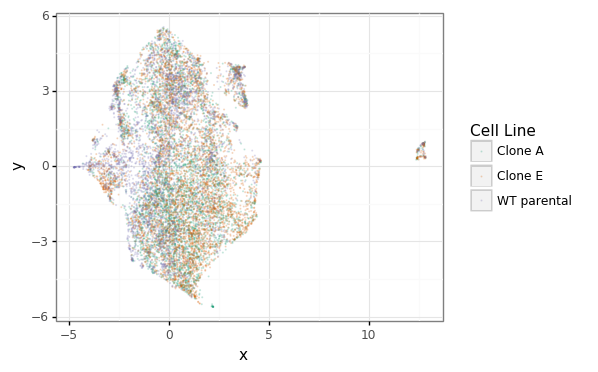

<ggplot: (316715314)>


/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 5 x 4 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/single_cell_umap_well_train.png
  warn('Filename: {}'.format(filename))


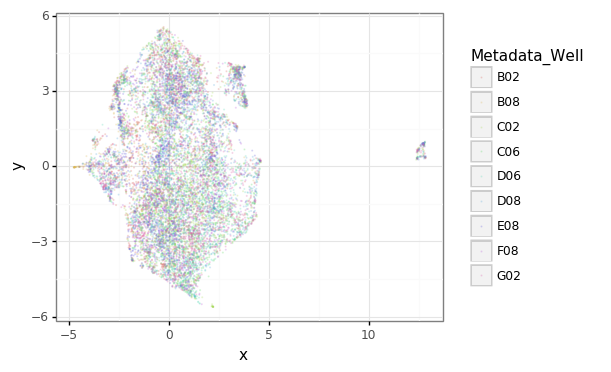

<ggplot: (-9223372036540537435)>


/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 5 x 4 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/single_cell_umap_test.png
  warn('Filename: {}'.format(filename))


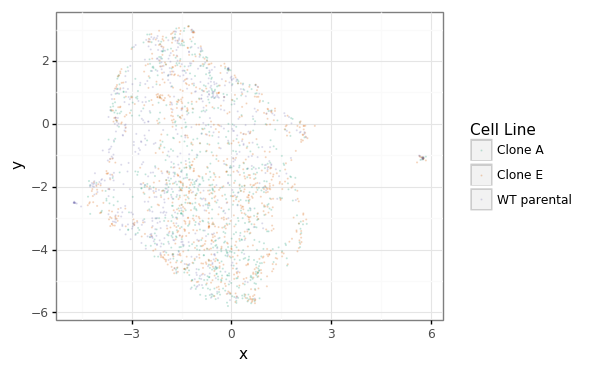

<ggplot: (317264637)>


/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 5 x 4 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/single_cell_umap_well_test.png
  warn('Filename: {}'.format(filename))


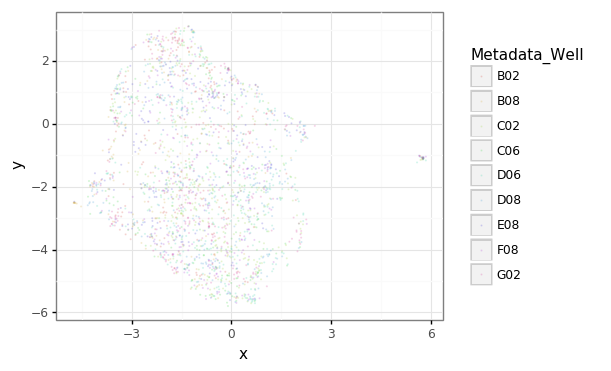

<ggplot: (-9223372036537337561)>


/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 5 x 4 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/single_cell_umap_holdout.png
  warn('Filename: {}'.format(filename))


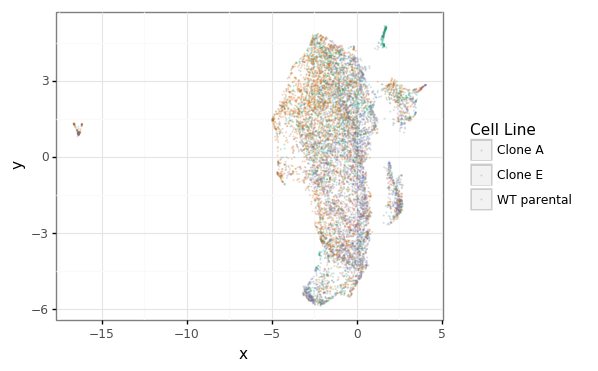

<ggplot: (-9223372036540533788)>


/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 5 x 4 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/single_cell_umap_well_holdout.png
  warn('Filename: {}'.format(filename))


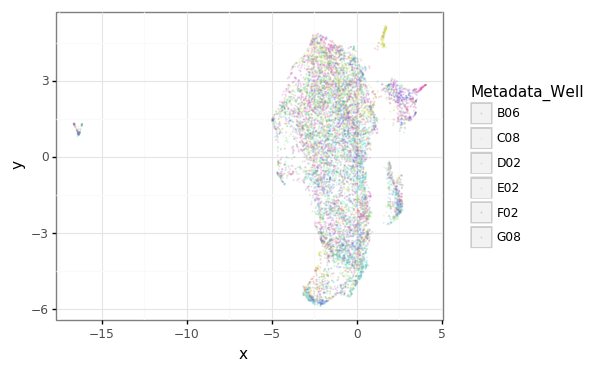

<ggplot: (313318888)>


/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 5 x 4 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/single_cell_umap_othertreatment.png
  warn('Filename: {}'.format(filename))


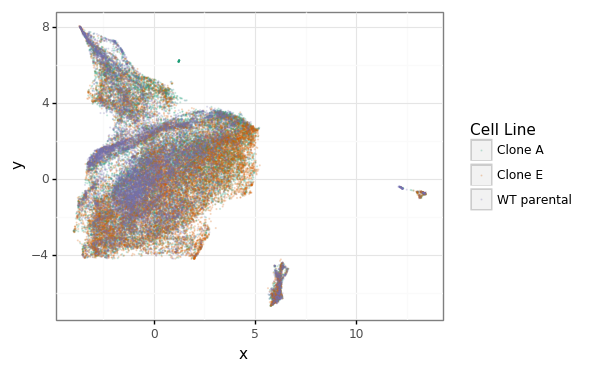

<ggplot: (316928548)>


/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 5 x 4 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/single_cell_umap_well_othertreatment.png
  warn('Filename: {}'.format(filename))


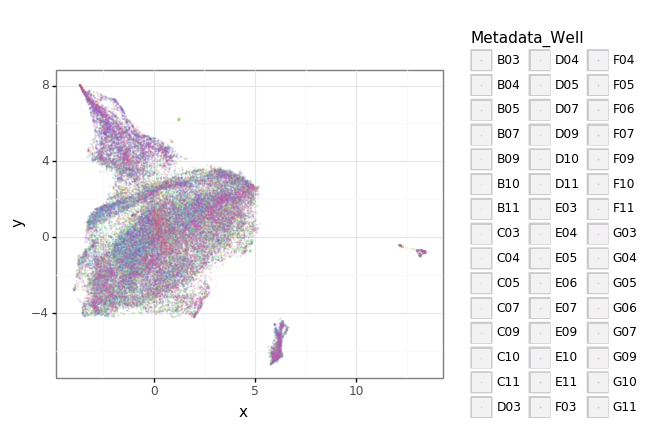

<ggplot: (-9223372036541152042)>


In [7]:
for data_fit, embedding_df in embedding_dict.items():
    fig_file = pathlib.Path("figures", "umap", f"single_cell_umap_{data_fit}.png")
    cell_gg = plot_umap_cell_line(
        embedding_df, fig_file, cell_line_column, cell_line_labels, cell_line_colors
    )
    print(cell_gg)
    
    fig_file = pathlib.Path("figures", "umap", f"single_cell_umap_well_{data_fit}.png")
    well_gg = plot_umap_well(embedding_df, fig_file, well_column)
    print(well_gg)

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 5 x 4 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/single_cell_othertreatment.png
  warn('Filename: {}'.format(filename))


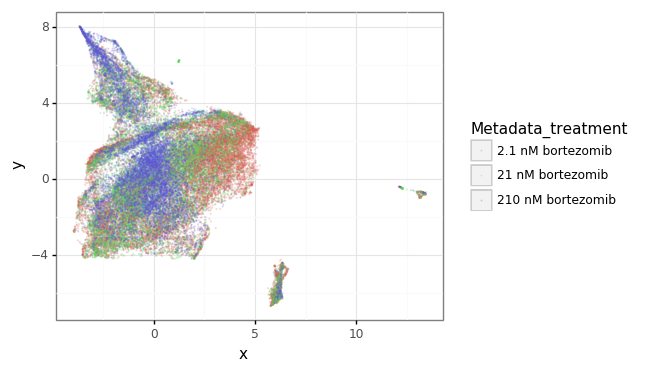

<ggplot: (-9223372036540949893)>

In [8]:
treatment_gg = (
    gg.ggplot(embedding_dict["othertreatment"], gg.aes(x="x", y="y")) +
    gg.geom_point(gg.aes(color="Metadata_treatment"), size = 0.2, shape = ".", alpha = 0.2) +
    gg.theme_bw() 
)

fig_file = pathlib.Path("figures", "umap", "single_cell_othertreatment.png")
treatment_gg.save(filename=fig_file, height=4, width=5, dpi=500)

treatment_gg